<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/10_de_diciembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#orlando vs mil

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.5970 - auc: 0.6459 - loss: 0.6714 - val_accuracy: 0.7250 - val_auc: 0.7871 - val_loss: 0.6488
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7112 - auc: 0.7551 - loss: 0.6386 - val_accuracy: 0.7625 - val_auc: 0.8314 - val_loss: 0.6173
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7547 - auc: 0.8092 - loss: 0.6066 - val_accuracy: 0.8000 - val_auc: 0.8333 - val_loss: 0.5877
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7613 - auc: 0.7972 - loss: 0.5992 - val_accuracy: 0.8000 - val_auc: 0.8389 - val_loss: 0.5606
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7185 - auc: 0.7910 - loss: 0.5832 - val_accuracy: 0.7875 - val_auc: 0.8385 - val_loss: 0.5382
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7552 - auc: 0.8033 - loss: 0.5656 - val_accuracy: 0.8250 - val_auc: 0.8434 - val_loss: 0.5200
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 

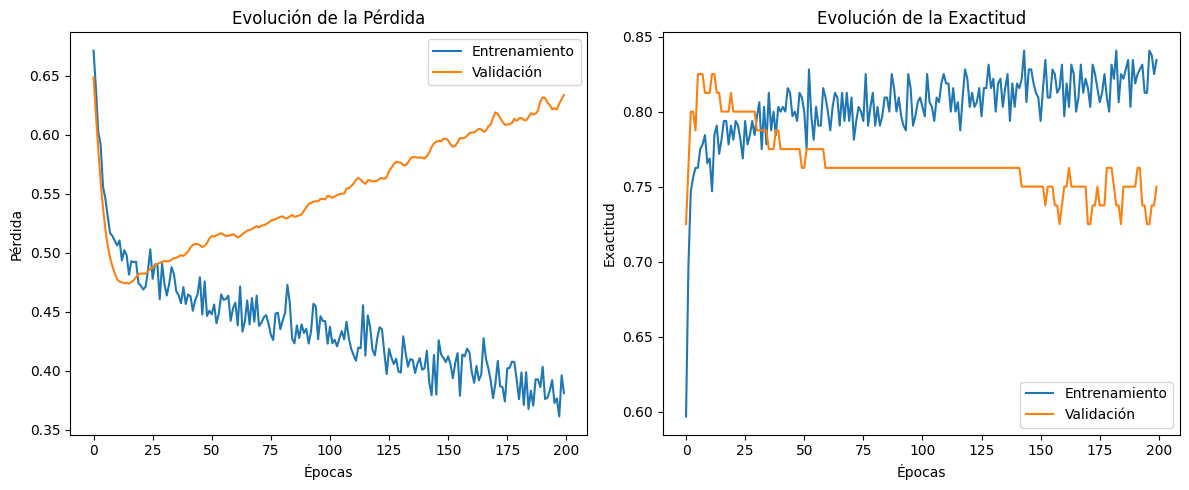

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicción para un nuevo juego:
Probabilidad de Over: 0.8673785
Predicción: Over


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

# =====================================
# Ajuste de semillas para reproducibilidad (en la medida de lo posible)
np.random.seed(42)
tf.random.set_seed(42)

# =====================================
# Función para construir el modelo
def build_model(input_dim):
    """
    Construye y devuelve un modelo secuencial de Keras para clasificación binaria.

    Parámetros:
    -----------
    input_dim : int
        Dimensión de la capa de entrada, es decir, la cantidad de features.

    Retorna:
    --------
    model : tf.keras.Model
        Modelo compilado listo para ser entrenado.
    """
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Salida binaria
    ])

    # Se agrega AUC además de accuracy para tener más métricas
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

# =====================================
# Función para graficar la historia de entrenamiento
def plot_training_history(history):
    """
    Grafica la pérdida y la exactitud (y otras métricas si están disponibles)
    del entrenamiento en función de las épocas.

    Parámetros:
    -----------
    history : History object
        Objeto History devuelto por model.fit con información del entrenamiento.
    """
    # Plot de la pérdida
    plt.figure(figsize=(12, 5))

    # Pérdida de entrenamiento y validación
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Evolución de la Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Exactitud de entrenamiento y validación
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Evolución de la Exactitud')
    plt.xlabel('Épocas')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

# =====================================
# Generación de dataset sintético
# -------------------------------------
# Suponemos un escenario de apuestas deportivas Over/Under para un partido de baloncesto.
# Las características incluyen promedios de puntos anotados por el equipo local y visitante,
# una línea total (total_line) representando la apuesta Over/Under, y un índice de forma reciente
# (home_team_recent_form y away_team_recent_form).

num_samples = 500

data = pd.DataFrame({
    'home_team_avg_points': np.random.uniform(100, 120, num_samples),
    'away_team_avg_points': np.random.uniform(100, 120, num_samples),
    'total_line': np.random.uniform(200, 240, num_samples),
    'home_team_recent_form': np.random.uniform(0.3, 0.8, num_samples),
    'away_team_recent_form': np.random.uniform(0.3, 0.8, num_samples),
})

# Creamos las etiquetas (over/under) en función de puntos generados mediante una Poisson
data['home_team_points'] = np.random.poisson(data['home_team_avg_points'])
data['away_team_points'] = np.random.poisson(data['away_team_avg_points'])
data['total_points'] = data['home_team_points'] + data['away_team_points']
data['over_under'] = np.where(data['total_points'] > data['total_line'], 1, 0)

# Seleccionamos las características y la etiqueta
features = ['home_team_avg_points', 'away_team_avg_points', 'total_line',
            'home_team_recent_form', 'away_team_recent_form']
X = data[features]
y = data['over_under']

# División entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construimos y entrenamos el modelo
model = build_model(input_dim=X_train.shape[1])

history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_split=0.2, verbose=1)

# Evaluación del modelo en el set de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("====================================")
print("Rendimiento en el conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Gráfica de la historia de entrenamiento
plot_training_history(history)

# Ejemplo de predicción con un nuevo juego sintético
new_game = pd.DataFrame({
    'home_team_avg_points': [118],
    'away_team_avg_points': [113.8],
    'total_line': [215],
    'home_team_recent_form': [0.5],
    'away_team_recent_form': [0.6]
})

new_game_scaled = scaler.transform(new_game)
prediction = model.predict(new_game_scaled)

print("====================================")
print("Predicción para un nuevo juego:")
print("Probabilidad de Over:", prediction[0][0])
print("Predicción:", "Over" if prediction[0][0] > 0.5 else "Under")

# Nota: En un proyecto real se recomienda:
# - Guardar el modelo entrenado (model.save('modelo_over_under.h5'))
# - Ajustar hiperparámetros usando técnicas como Keras Tuner o GridSearch.
# - Manejar logs con logging en lugar de print para un entorno de producción.


#dal vs okc

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5906 - auc: 0.6780 - loss: 0.6584 - val_accuracy: 0.6625 - val_auc: 0.7799 - val_loss: 0.6267
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6474 - auc: 0.7202 - loss: 0.6329 - val_accuracy: 0.7625 - val_auc: 0.8369 - val_loss: 0.5927
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7135 - auc: 0.7771 - loss: 0.6004 - val_accuracy: 0.7375 - val_auc: 0.8542 - val_loss: 0.5610
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7048 - auc: 0.7821 - loss: 0.5854 - val_accuracy: 0.7750 - val_auc: 0.8571 - val_loss: 0.5348
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7397 - auc: 0.8101 - loss: 0.5661 - val_accuracy: 0.7750 - val_auc: 0.8600 - val_loss: 0.5134
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7405 - auc: 0.8086 - loss: 0.5562 - val_accuracy: 0.8000 - val_auc: 0.8561 - val_loss: 0.4967
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

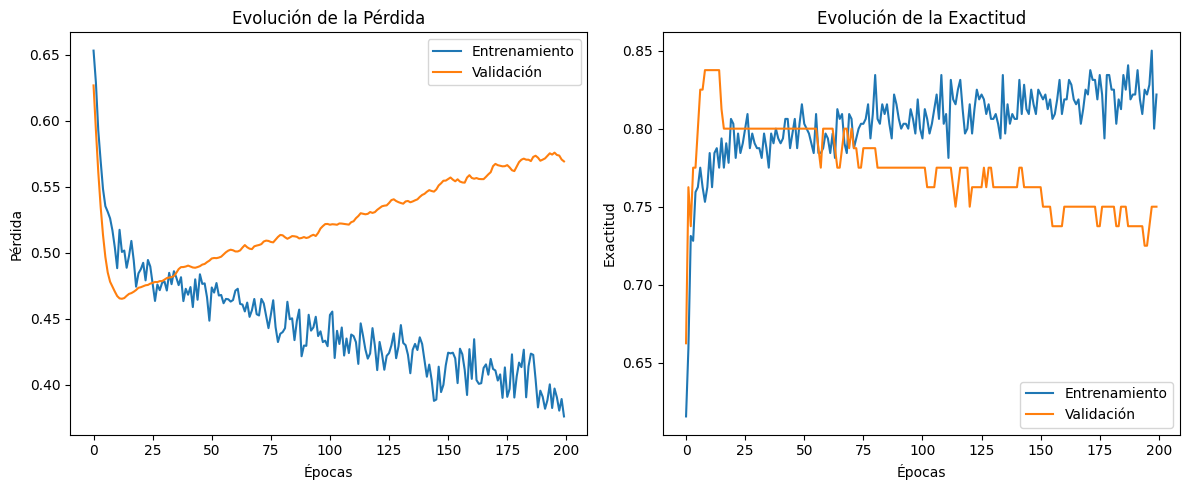

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicción para un nuevo juego:
Probabilidad de Over: 0.87017417
Predicción: Over


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

# =====================================
# Ajuste de semillas para reproducibilidad (en la medida de lo posible)
np.random.seed(42)
tf.random.set_seed(42)

# =====================================
# Función para construir el modelo
def build_model(input_dim):
    """
    Construye y devuelve un modelo secuencial de Keras para clasificación binaria.

    Parámetros:
    -----------
    input_dim : int
        Dimensión de la capa de entrada, es decir, la cantidad de features.

    Retorna:
    --------
    model : tf.keras.Model
        Modelo compilado listo para ser entrenado.
    """
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Salida binaria
    ])

    # Se agrega AUC además de accuracy para tener más métricas
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

# =====================================
# Función para graficar la historia de entrenamiento
def plot_training_history(history):
    """
    Grafica la pérdida y la exactitud (y otras métricas si están disponibles)
    del entrenamiento en función de las épocas.

    Parámetros:
    -----------
    history : History object
        Objeto History devuelto por model.fit con información del entrenamiento.
    """
    # Plot de la pérdida
    plt.figure(figsize=(12, 5))

    # Pérdida de entrenamiento y validación
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Evolución de la Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Exactitud de entrenamiento y validación
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Evolución de la Exactitud')
    plt.xlabel('Épocas')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

# =====================================
# Generación de dataset sintético
# -------------------------------------
# Suponemos un escenario de apuestas deportivas Over/Under para un partido de baloncesto.
# Las características incluyen promedios de puntos anotados por el equipo local y visitante,
# una línea total (total_line) representando la apuesta Over/Under, y un índice de forma reciente
# (home_team_recent_form y away_team_recent_form).

num_samples = 500

data = pd.DataFrame({
    'home_team_avg_points': np.random.uniform(100, 120, num_samples),
    'away_team_avg_points': np.random.uniform(100, 120, num_samples),
    'total_line': np.random.uniform(200, 240, num_samples),
    'home_team_recent_form': np.random.uniform(0.3, 0.8, num_samples),
    'away_team_recent_form': np.random.uniform(0.3, 0.8, num_samples),
})

# Creamos las etiquetas (over/under) en función de puntos generados mediante una Poisson
data['home_team_points'] = np.random.poisson(data['home_team_avg_points'])
data['away_team_points'] = np.random.poisson(data['away_team_avg_points'])
data['total_points'] = data['home_team_points'] + data['away_team_points']
data['over_under'] = np.where(data['total_points'] > data['total_line'], 1, 0)

# Seleccionamos las características y la etiqueta
features = ['home_team_avg_points', 'away_team_avg_points', 'total_line',
            'home_team_recent_form', 'away_team_recent_form']
X = data[features]
y = data['over_under']

# División entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construimos y entrenamos el modelo
model = build_model(input_dim=X_train.shape[1])

history = model.fit(X_train, y_train, epochs=200, batch_size=32,
                    validation_split=0.2, verbose=1)

# Evaluación del modelo en el set de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("====================================")
print("Rendimiento en el conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Gráfica de la historia de entrenamiento
plot_training_history(history)

# Ejemplo de predicción con un nuevo juego sintético
new_game = pd.DataFrame({
    'home_team_avg_points': [117.6],
    'away_team_avg_points': [120.4],
    'total_line': [230.5],
    'home_team_recent_form': [0.5],
    'away_team_recent_form': [0.8]
})

new_game_scaled = scaler.transform(new_game)
prediction = model.predict(new_game_scaled)

print("====================================")
print("Predicción para un nuevo juego:")
print("Probabilidad de Over:", prediction[0][0])
print("Predicción:", "Over" if prediction[0][0] > 0.5 else "Under")

# Nota: En un proyecto real se recomienda:
# - Guardar el modelo entrenado (model.save('modelo_over_under.h5'))
# - Ajustar hiperparámetros usando técnicas como Keras Tuner o GridSearch.
# - Manejar logs con logging en lugar de print para un entorno de producción.
